In [54]:
import pandas as pd
import numpy as np
import os, random

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import pickle

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
from collections import Counter

In [55]:
os.listdir('datasets/CADEC/CADEC.v2/cadec')

['meddra',
 'meddra - unedited version of edited files',
 'original',
 'original - unedited version of edited files',
 'sct',
 'sct - unedited version of edited files',
 'text']

In [56]:
suf = '_v2'

data_save_dir = 'data'+suf

In [57]:
meddra_counts = pd.read_csv(data_save_dir+'/meddra_counts.csv')
meddra_counts

,ner,meddra,counts_exploded,counts,counts_exploded_rank
0,Drug,Lipitor,1081,1073,1
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
...,...,...,...,...,...
1294,Finding,Senility,1,1,1233
1295,Drug,Seroquel,1,1,1233
1296,Drug,Solaraze,1,1,1233
1297,Drug,Tagamet,1,1,1233


In [58]:
meddra_counts.loc[meddra_counts.ner == 'ADR',:]

,ner,meddra,counts_exploded,counts,counts_exploded_rank
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
5,ADR,Arthralgia,280,163,6
...,...,...,...,...,...
1268,ADR,Labyrinthitis,1,1,1233
1269,ADR,Dysphagia,1,1,1233
1275,ADR,Lupus_erythematosus,1,1,1233
1278,ADR,Cataract,1,1,1233


In [59]:
with open(data_save_dir+'/cadec_flair_objects.pkl', 'rb') as f:
    docs = pickle.load(f)
docs[:10]

[Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/E-ADR/E-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/E-ADR/E-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/E-ADR/E-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/S-Drug/S-Arthrotec, "50"/O/O, "for"/O/O, "over"

In [60]:
len(docs)

1186

In [61]:
temp = docs[433]
temp.to_plain_string

<bound method Sentence.to_plain_string of Sentence[157]: "wow , so im not crazy after all ! my dr cant seem to find out why my feet hurt in the morning and unexplained joint pain , i get even after just sitting for an hour watching tv in the evening . man i get up and i can hardly walk . stiffness in my feet , and leg joint . dr has done x - ray and everything . im think he is thinking it is in my head all this pain . now when i so called sleep at night i have been noticing i get numbness in my hands , and it isnt due to me lying on my arms or anything , and my lt wrist joint , where my thumb is attached , is dislocating or it painfully sticks . and i have to painfully put it back in . im going to show this website to my gp ! ." → ["wow"/O/O, ","/O/O, "so"/O/O, "im"/O/O, "not"/O/O, "crazy"/O/O, "after"/O/O, "all"/O/O, "!"/O/O, "my"/O/O, "dr"/O/O, "cant"/O/O, "seem"/O/O, "to"/O/O, "find"/O/O, "out"/O/O, "why"/O/O, "my"/O/O, "feet"/B-ADR/B-Foot_pain, "hurt"/E-ADR/E-Foot_pain, "in"/O/O, "

In [62]:
temp.annotation_layers

{'ner': ['Token[0]: "wow"'/'O' (1.0),
  'Token[1]: ","'/'O' (1.0),
  'Token[2]: "so"'/'O' (1.0),
  'Token[3]: "im"'/'O' (1.0),
  'Token[4]: "not"'/'O' (1.0),
  'Token[5]: "crazy"'/'O' (1.0),
  'Token[6]: "after"'/'O' (1.0),
  'Token[7]: "all"'/'O' (1.0),
  'Token[8]: "!"'/'O' (1.0),
  'Token[9]: "my"'/'O' (1.0),
  'Token[10]: "dr"'/'O' (1.0),
  'Token[11]: "cant"'/'O' (1.0),
  'Token[12]: "seem"'/'O' (1.0),
  'Token[13]: "to"'/'O' (1.0),
  'Token[14]: "find"'/'O' (1.0),
  'Token[15]: "out"'/'O' (1.0),
  'Token[16]: "why"'/'O' (1.0),
  'Token[17]: "my"'/'O' (1.0),
  'Token[18]: "feet"'/'B-ADR' (1.0),
  'Token[19]: "hurt"'/'E-ADR' (1.0),
  'Token[20]: "in"'/'O' (1.0),
  'Token[21]: "the"'/'O' (1.0),
  'Token[22]: "morning"'/'O' (1.0),
  'Token[23]: "and"'/'O' (1.0),
  'Token[24]: "unexplained"'/'O' (1.0),
  'Token[25]: "joint"'/'B-ADR' (1.0),
  'Token[26]: "pain"'/'E-ADR' (1.0),
  'Token[27]: ","'/'O' (1.0),
  'Token[28]: "i"'/'O' (1.0),
  'Token[29]: "get"'/'O' (1.0),
  'Token[30]: "eve

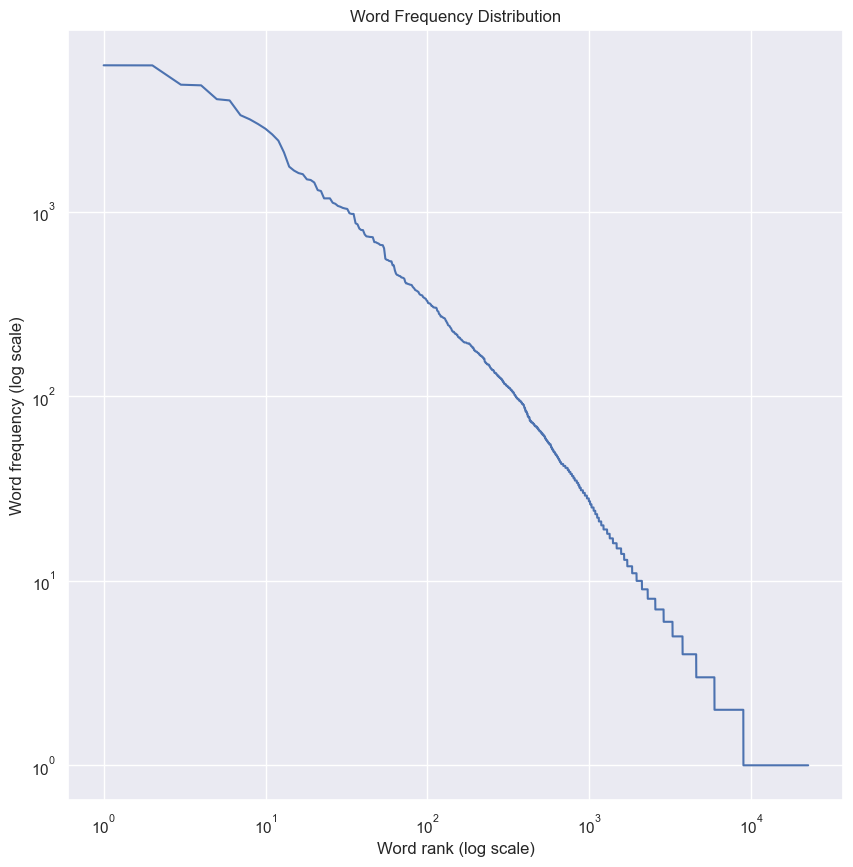

In [63]:
# # import seaborn as sns
# import matplotlib.pyplot as plt
# from collections import Counter
# from itertools import chain
# # from flair.data import Sentence

# Assume that you have a list of Flair Sentence objects called 'sentences'
text = ' '.join([str(sentence) for sentence in docs])
words = text.split()
word_freq = Counter(words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
freqs = [f for w, f in sorted_word_freq]
ranks = range(1, len(sorted_word_freq)+1)

# Set the plot style and scale
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1", 8, .75)
sns.set(rc={'figure.figsize':(10,10)})
sns.color_palette("tab10")

# Create the plot
sns.lineplot(x=ranks, y=freqs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Word rank (log scale)')
plt.ylabel('Word frequency (log scale)')
plt.title('Word Frequency Distribution')

# Show the plot
plt.show()


In [64]:
def get_all_labels(token):
    res = dict()
    for typename in token.sentence.annotation_layers.keys():
        res[typename] = [a for a in token.sentence.annotation_layers[typename] if a.data_point.start_position == token.start_position]
    return res

In [65]:
train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=321)
dev_docs, test_docs = train_test_split(test_docs, test_size=0.5, random_state=123)

In [66]:
# get all unique ner tags, excluding leading conll ordering term
ner_tags = []
for doc in train_docs:
    for token in doc:
        labels = get_all_labels(token)
        if "ner" in labels:
            for label in labels["ner"]:
                ner_tags.append(label.value)

# get all unique meddra tags, excluding leading conll ordering term
meddra_tags = []
for doc in train_docs:
    for token in doc:
        labels = get_all_labels(token)
        if "meddra" in labels:
            for label in labels["meddra"]:
                meddra_tags.append(label.value)
ner_tags = Counter(ner_tags)
del ner_tags['O']
meddra_tags = Counter(meddra_tags)
del meddra_tags['O']

ner_tags_ordered = [a[0] for a in ner_tags.most_common()]
meddra_tags_ordered = [a[0] for a in meddra_tags.most_common()]

print("Unique NER tags:", ner_tags)
print("Unique Meddra tags:", meddra_tags)


Unique NER tags: Counter({'I-ADR': 4449, 'E-ADR': 3506, 'B-ADR': 3349, 'S-ADR': 1363, 'S-Drug': 1286, 'B-Finding': 200, 'E-Finding': 200, 'I-Finding': 149, 'B-Disease': 119, 'E-Disease': 119, 'E-Symptom': 114, 'S-Disease': 112, 'S-Symptom': 112, 'E-Drug': 111, 'B-Symptom': 110, 'B-Drug': 110, 'S-Finding': 109, 'I-Symptom': 104, 'I-Drug': 50, 'I-Disease': 50})
Unique Meddra tags: Counter({'S-Lipitor': 825, 'I-CONCEPT_LESS': 514, 'S-Pain': 275, 'I-Severe_pain': 265, 'B-CONCEPT_LESS': 232, 'E-CONCEPT_LESS': 232, 'E-Myalgia': 209, 'B-Myalgia': 205, 'E-Severe_pain': 160, 'B-Severe_pain': 138, 'S-CONCEPT_LESS': 119, 'B-Arthralgia': 107, 'E-Arthralgia': 106, 'I-Muscle_weakness': 93, 'S-Depression': 91, 'I-Myalgia': 87, 'S-Fatigue': 87, 'I-Walking_disability': 75, 'I-Pins_and_needles': 68, 'B-Cramp_in_lower_limb': 67, 'E-Cramp_in_lower_limb': 66, 'I-Poor_short-term_memory': 66, 'I-Weakness_of_limb': 64, 'S-Headache': 63, 'B-Backache': 62, 'E-Backache': 62, 'B-Muscle_weakness': 59, 'E-Muscle_we

In [67]:
len(ner_tags)

20

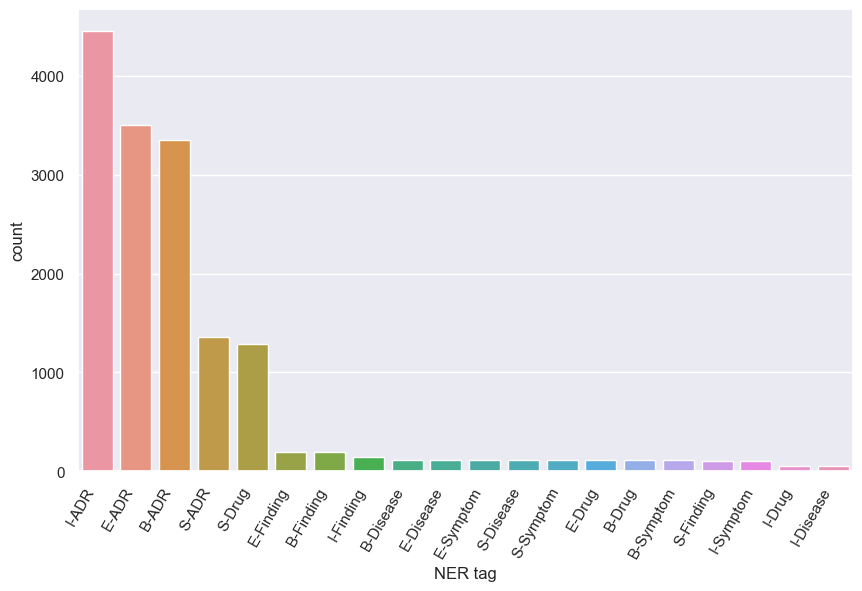

In [68]:
tab = pd.DataFrame([[a, b] for a,b in ner_tags.items()], columns = ['NER tag','count'])
tab = tab.sort_values('count',ascending=False)


sns.set(rc={'figure.figsize':(10,6)})
chart = sns.barplot(tab, x='NER tag',y='count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

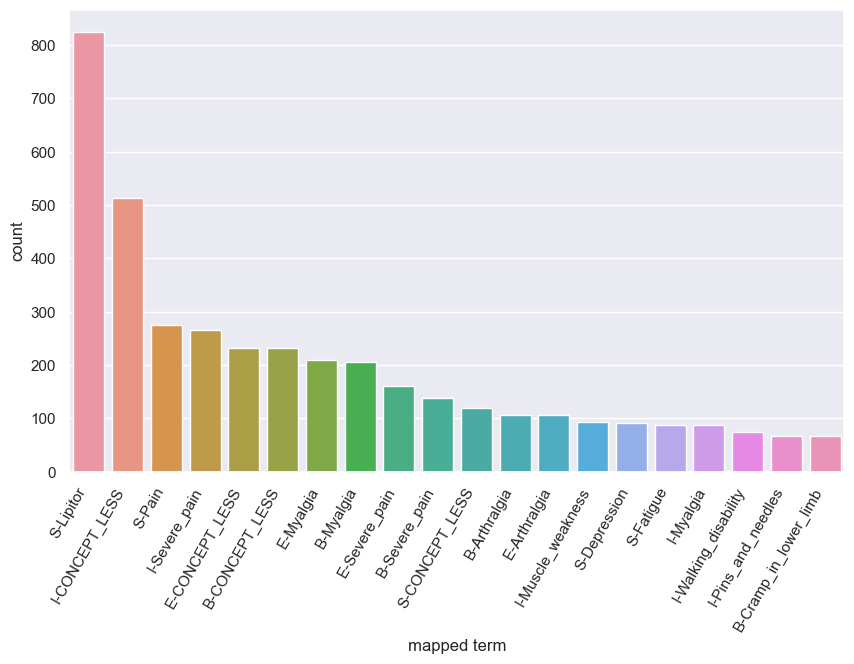

In [69]:
tab = pd.DataFrame([[a, b] for a,b in meddra_tags.items()], columns = ['mapped term','count'])
tab = tab.sort_values('count',ascending=False)

sns.set(rc={'figure.figsize':(10,6)})
chart = sns.barplot(tab[:20], x='mapped term',y='count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

In [70]:
tab

,mapped term,count
9,S-Lipitor,825
59,I-CONCEPT_LESS,514
12,S-Pain,275
1,I-Severe_pain,265
60,E-CONCEPT_LESS,232
...,...,...
836,S-soy_lecithin,1
835,E-Daily_headache,1
834,I-Daily_headache,1
833,B-Daily_headache,1


In [71]:
def repeat_arr(lst, n):
    if len(lst) < n:
        lst *= (n // len(lst)) + 1
    return lst

In [72]:
def remove_o_tags(y_true, y_pred):
    # y_true_no_o = []
    # y_pred_no_o = []
    # for true, pred in zip(y_true, y_pred):
    #     if true != 'O':
    #         y_true_no_o.append(true)
    #         y_pred_no_o.append(pred)
    # return y_true_no_o, y_pred_no_o
    
    return y_true, y_pred


## ner - random baseline

## ner - most frequent baseline

In [73]:
res_random = res_mostfreq = pd.DataFrame(columns=['split','index']+ner_tags_ordered)
train=None
for split, split_name in [(train_docs,'train'),(dev_docs,'dev'),(test_docs,'test')]:
    y_true = []
    for doc in tqdm(split, total=len(split)):
        for token in doc:
            labels = get_all_labels(token)
            y_true += [a.value for a in labels['ner']]
            
    if split_name == 'train':
        train = y_true
            
    np.random.seed(1234)
    y_pred = random.sample(repeat_arr(sorted(ner_tags_ordered+['O']), len(y_true)), len(y_true))
    y_true1, y_pred1 = remove_o_tags(y_true, y_pred)
    res = pd.DataFrame.from_dict(classification_report(y_true1, y_pred1, output_dict=True, zero_division=0)).reset_index()
    temp = res['index']
    res.drop('index',axis=1,inplace=True)
    res.insert(loc=0, column='split', value=split_name)
    res.insert(loc=1, column='index', value=temp)
    res_random = pd.concat([res_random, res],ignore_index=True)
    
    mostfreq = ner_tags_ordered[0]
    print(mostfreq)
    y_pred = [mostfreq]*len(y_true)
    y_true1, y_pred1 = remove_o_tags(y_true, y_pred)
    res = pd.DataFrame.from_dict(classification_report(y_true1, y_pred1, output_dict=True, zero_division=0)).reset_index()
    temp = res['index']
    res.drop('index',axis=1,inplace=True)
    res.insert(loc=0, column='split', value=split_name)
    res.insert(loc=1, column='index', value=temp)
    res_mostfreq = pd.concat([res_mostfreq, res],ignore_index=True)

if 'O' in res_random.columns:
    res_random.drop('O',axis=1,inplace=True)
if 'O' in res_mostfreq.columns:
    res_mostfreq.drop('O',axis=1,inplace=True)

res_random = res_random.iloc[:, :res_random.columns.get_loc('weighted avg')+1]
res_mostfreq = res_mostfreq.iloc[:, :res_mostfreq.columns.get_loc('weighted avg')+1]

res_random.to_csv('baseline_ner_model'+suf+'/random_classification_report.csv',index=False)
res_mostfreq.to_csv('baseline_ner_model'+suf+'/mostfreq_classification_report.csv',index=False)

100%|██████████| 948/948 [00:06<00:00, 146.52it/s]


I-ADR


100%|██████████| 119/119 [00:00<00:00, 145.49it/s]


I-ADR


100%|██████████| 119/119 [00:00<00:00, 154.99it/s]


I-ADR


In [74]:
res_random

,split,index,I-ADR,E-ADR,B-ADR,S-ADR,S-Drug,B-Finding,E-Finding,I-Finding,...,E-Drug,B-Symptom,B-Drug,S-Finding,I-Symptom,I-Drug,I-Disease,accuracy,macro avg,weighted avg
0,train,precision,0.046754,0.036996,0.037456,0.017952,0.010419,0.002215,0.001994,0.001108,...,0.000665,0.000886,0.001108,0.001108,0.000886,0.000222,0.000443,0.047511,0.047514,0.697116
1,train,recall,0.047426,0.047633,0.050463,0.059428,0.036547,0.050000,0.045000,0.033557,...,0.027027,0.036364,0.045455,0.045872,0.038462,0.020000,0.040000,0.047511,0.047094,0.047511
2,train,f1-score,0.047088,0.041646,0.042997,0.027574,0.016215,0.004243,0.003818,0.002145,...,0.001297,0.001730,0.002163,0.002163,0.001732,0.000438,0.000877,0.047511,0.014366,0.080656
3,train,support,4449.000000,3506.000000,3349.000000,1363.000000,1286.000000,200.000000,200.000000,149.000000,...,111.000000,110.000000,110.000000,109.000000,104.000000,50.000000,50.000000,0.047511,94779.000000,94779.000000
4,dev,precision,0.041051,0.042693,0.037829,0.014803,0.011494,0.001642,0.001645,0.001645,...,0.003295,0.001642,0.001650,0.003289,0.003289,0.000000,0.000000,0.047906,0.047991,0.709215
5,dev,recall,0.048356,0.057906,0.052036,0.043062,0.042683,0.025641,0.029412,0.050000,...,0.100000,0.083333,0.050000,0.080000,0.086957,0.000000,0.000000,0.047906,0.041616,0.047906
6,dev,f1-score,0.044405,0.049149,0.043810,0.022032,0.018111,0.003086,0.003115,0.003185,...,0.006380,0.003221,0.003195,0.006319,0.006339,0.000000,0.000000,0.047906,0.014557,0.081262
7,dev,support,517.000000,449.000000,442.000000,209.000000,164.000000,39.000000,34.000000,20.000000,...,20.000000,12.000000,20.000000,25.000000,23.000000,7.000000,13.000000,0.047906,12775.000000,12775.000000
8,test,precision,0.037300,0.026596,0.039007,0.014184,0.015986,0.005319,0.000000,0.000000,...,0.000000,0.000000,0.005319,0.008865,0.000000,0.001776,0.000000,0.047144,0.047117,0.696345
9,test,recall,0.040000,0.033937,0.052632,0.050633,0.046875,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.111111,0.178571,0.000000,0.040000,0.000000,0.047144,0.042526,0.047144


In [75]:
res_mostfreq

,split,index,I-ADR,E-ADR,B-ADR,S-ADR,S-Drug,B-Finding,E-Finding,I-Finding,...,E-Drug,B-Symptom,B-Drug,S-Finding,I-Symptom,I-Drug,I-Disease,accuracy,macro avg,weighted avg
0,train,precision,0.046941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046941,0.002235,0.002203
1,train,recall,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046941,0.047619,0.046941
2,train,f1-score,0.089672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046941,0.004270,0.004209
3,train,support,4449.000000,3506.0,3349.0,1363.0,1286.0,200.0,200.0,149.0,...,111.0,110.0,110.0,109.0,104.0,50.0,50.0,0.046941,94779.000000,94779.000000
4,dev,precision,0.040470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040470,0.001927,0.001638
5,dev,recall,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040470,0.047619,0.040470
6,dev,f1-score,0.077791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040470,0.003704,0.003148
7,dev,support,517.000000,449.0,442.0,209.0,164.0,39.0,34.0,20.0,...,20.0,12.0,20.0,25.0,23.0,7.0,13.0,0.040470,12775.000000,12775.000000
8,test,precision,0.044356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044356,0.002112,0.001967
9,test,recall,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044356,0.047619,0.044356


## meddra - random baseline

## meddra - most frequent baseline

In [76]:
res_random = res_mostfreq = pd.DataFrame(columns=['split','index']+meddra_tags_ordered)
train=None
for split, split_name in [(train_docs,'train'),(dev_docs,'dev'),(test_docs,'test')]:
    y_true = []
    for doc in tqdm(split, total=len(split)):
        for token in doc:
            labels = get_all_labels(token)
            y_true += [a.value for a in labels['meddra']]
    
    if split_name == 'train':
        train = y_true
    
    np.random.seed(1234)
    y_pred = random.sample(repeat_arr(sorted(meddra_tags_ordered+['O']), len(y_true)), len(y_true))
    y_true1, y_pred1 = remove_o_tags(y_true, y_pred)
    res = pd.DataFrame.from_dict(classification_report(y_true1, y_pred1, output_dict=True, zero_division=0)).reset_index()
    temp = res['index']
    res.drop('index',axis=1,inplace=True)
    res.insert(loc=0, column='split', value=split_name)
    res.insert(loc=1, column='index', value=temp)
    res_random = pd.concat([res_random, res],ignore_index=True)
    
    mostfreq = meddra_tags_ordered[0]
    print(mostfreq)
    y_pred = [mostfreq]*len(y_true)
    y_true1, y_pred1 = remove_o_tags(y_true, y_pred)
    res = pd.DataFrame.from_dict(classification_report(y_true1, y_pred1, output_dict=True, zero_division=0)).reset_index()
    temp = res['index']
    res.drop('index',axis=1,inplace=True)
    res.insert(loc=0, column='split', value=split_name)
    res.insert(loc=1, column='index', value=temp)
    res_mostfreq = pd.concat([res_mostfreq, res],ignore_index=True)

if 'O' in res_random.columns:
    res_random.drop('O',axis=1,inplace=True)
if 'O' in res_mostfreq.columns:
    res_mostfreq.drop('O',axis=1,inplace=True)

res_random = res_random.iloc[:, :res_random.columns.get_loc('weighted avg')+1]
res_mostfreq = res_mostfreq.iloc[:, :res_mostfreq.columns.get_loc('weighted avg')+1]

res_random.to_csv('baseline_meddra_model'+suf+'/random_classification_report.csv',index=False)
res_mostfreq.to_csv('baseline_meddra_model'+suf+'/mostfreq_classification_report.csv',index=False)

100%|██████████| 948/948 [00:06<00:00, 140.31it/s]


S-Lipitor


100%|██████████| 119/119 [00:00<00:00, 129.67it/s]


S-Lipitor


100%|██████████| 119/119 [00:00<00:00, 121.25it/s]


S-Lipitor


In [77]:
list(res_random.columns)

['split',
 'index',
 'S-Lipitor',
 'I-CONCEPT_LESS',
 'S-Pain',
 'I-Severe_pain',
 'B-CONCEPT_LESS',
 'E-CONCEPT_LESS',
 'E-Myalgia',
 'B-Myalgia',
 'E-Severe_pain',
 'B-Severe_pain',
 'S-CONCEPT_LESS',
 'B-Arthralgia',
 'E-Arthralgia',
 'I-Muscle_weakness',
 'S-Depression',
 'I-Myalgia',
 'S-Fatigue',
 'I-Walking_disability',
 'I-Pins_and_needles',
 'B-Cramp_in_lower_limb',
 'E-Cramp_in_lower_limb',
 'I-Poor_short-term_memory',
 'I-Weakness_of_limb',
 'S-Headache',
 'B-Backache',
 'E-Backache',
 'B-Muscle_weakness',
 'E-Muscle_weakness',
 'I-Foot_pain',
 'B-Pain_in_lower_limb',
 'E-Pain_in_lower_limb',
 'I-Hip_pain',
 'B-Amnesia',
 'E-Amnesia',
 'I-Pain_in_lower_limb',
 'B-Hip_pain',
 'E-Hip_pain',
 'S-Diarrhoea',
 'S-Muscle_cramp',
 'I-Shoulder_pain',
 'B-Walking_disability',
 'E-Walking_disability',
 'B-Knee_pain',
 'E-Knee_pain',
 'I-Cramp_in_lower_limb',
 'B-Shoulder_pain',
 'E-Shoulder_pain',
 'B-Muscle_cramp',
 'E-Muscle_cramp',
 'E-Stomach_ache',
 'S-Excessive_upper_gastrointes

In [78]:
res_random

,split,index,S-Lipitor,I-CONCEPT_LESS,S-Pain,I-Severe_pain,B-CONCEPT_LESS,E-CONCEPT_LESS,E-Myalgia,B-Myalgia,...,B-Morbid_thoughts,E-Morbid_thoughts,B-Feels_everything_is_futile,E-Feels_everything_is_futile,B-Transient_global_amnesia,I-Transient_global_amnesia,E-Transient_global_amnesia,accuracy,macro avg,weighted avg
0,train,precision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000377,3.766124e-04,0.636741
1,train,recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000377,8.403350e-05,0.000377
2,train,f1-score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000377,6.987041e-05,0.000684
3,train,support,825.0,514.0,275.0,265.0,232.0,232.0,209.0,205.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000377,9.551500e+04,95515.000000
4,dev,precision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000622,6.091239e-04,0.832755
5,dev,recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000622,8.020867e-04,0.000622
6,dev,f1-score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000622,2.780790e-04,0.000944
7,dev,support,120.0,63.0,44.0,19.0,33.0,33.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000622,1.286400e+04,12864.000000
8,test,precision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000335,3.862495e-04,0.824155
9,test,recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000335,1.569004e-07,0.000335


In [79]:
res_mostfreq

,split,index,S-Lipitor,I-CONCEPT_LESS,S-Pain,I-Severe_pain,B-CONCEPT_LESS,E-CONCEPT_LESS,E-Myalgia,B-Myalgia,...,B-Morbid_thoughts,E-Morbid_thoughts,B-Feels_everything_is_futile,E-Feels_everything_is_futile,B-Transient_global_amnesia,I-Transient_global_amnesia,E-Transient_global_amnesia,accuracy,macro avg,weighted avg
0,train,precision,0.008637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008637,0.000004,0.000075
1,train,recall,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008637,0.000408,0.008637
2,train,f1-score,0.017127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008637,0.000007,0.000148
3,train,support,825.000000,514.0,275.0,265.0,232.0,232.0,209.0,205.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.008637,95515.000000,95515.000000
4,dev,precision,0.009328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009328,0.000013,0.000087
5,dev,recall,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009328,0.001401,0.009328
6,dev,f1-score,0.018484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009328,0.000026,0.000172
7,dev,support,120.000000,63.0,44.0,19.0,33.0,33.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009328,12864.000000,12864.000000
8,test,precision,0.010462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010462,0.000015,0.000109
9,test,recall,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010462,0.001387,0.010462
